                    Variable  Coefficient
0               Customer_Age     0.036035
1                     Gender     0.030816
2            Dependent_count     0.079735
3            Income_Category    -0.051421
4              Card_Category     0.023982
5             Months_on_book    -0.017797
6   Total_Relationship_Count    -0.464380
7      Contacts_Count_12_mon     0.342052
8               Credit_Limit    -0.000283
9        Total_Revolving_Bal    -0.000573
10           Avg_Open_To_Buy     0.000290
11      Total_Amt_Chng_Q4_Q1    -0.045429
12           Total_Trans_Amt    -0.000315 

Overall profits:[-0.7981, -0.3571, -0.023, 0.1547, 0.2221, 0.2518, 0.2057, 0.1794, 0.1432, 0.0905, 0.0346, 0.0115, 0.0016]



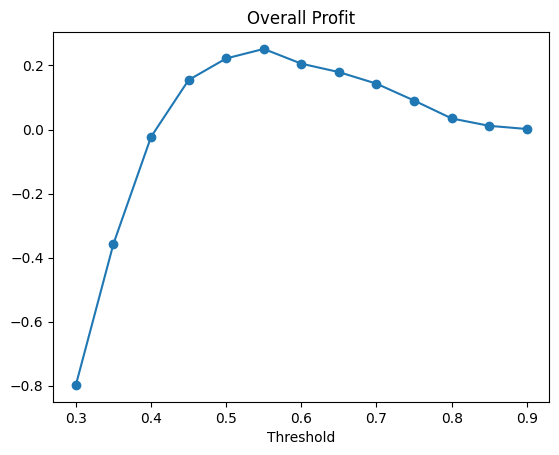

In [ ]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt

# Load the CSV file into a pandas dataframe
df = pd.read_csv('/content/drive/MyDrive/파이낸셜/중간고사/bank_customer.csv')

# Split the dataframe into independent and dependent variables
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.6, random_state=37)

# Create the logistic regression model
log_reg = LogisticRegression()

# Fit the model to the training data
log_reg.fit(X_train, y_train)

# Print the regression coefficients
coefficients = pd.DataFrame({'Variable': df.columns[:-1], 'Coefficient': log_reg.coef_.flatten()})
print(coefficients, '\n')

# Predict the target variable for the test data
threshold_list = np.arange(0.3, 0.90, 0.05)
overall_profit_list = []
# Profits=Chance of Persuading ×Benefits per Renewal ×TP-Costs per Call×(TP+FP)
chance_of_persuading = 0.03
benefits_per_renewal = 1000
cost_per_call = 20

for threshold in threshold_list:
  y_pred = ( log_reg.predict_proba(X_test)[:, 1] >= threshold )
  conf_mat = confusion_matrix(y_test, y_pred)/len(y_test)
  overall_profit = chance_of_persuading * benefits_per_renewal * conf_mat[1,1] - cost_per_call* (conf_mat[0,1] + conf_mat[1,1])
  overall_profit = overall_profit.round(4)
  overall_profit_list.append(overall_profit)

print('Overall profits:{}\n'.format(overall_profit_list))

plt.plot(threshold_list, overall_profit_list, marker='o')
plt.xlabel('Threshold')
plt.title('Overall Profit')
plt.show()
